<a href="https://colab.research.google.com/github/maicon-reis/indice_de_forca_relativa/blob/main/Fun%C3%A7%C3%A3o_cria_mapa_IRF_e_RSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando bibliotecas 
!pip install -q ta
!pip install -q yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 11.6 MB/s 


In [77]:
# carregando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import date
import ta
import yfinance as yf

yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

def calcula_ifr(ativos, inicio, p=10, p_rsi=14):
    # Cria um data frame vazio
    carteira = pd.DataFrame()

    # popula o data frame
    for t in ativos:
        carteira[t] = pdr.get_data_yahoo(t, start=inicio, end=date.today())['Adj Close']
    
    carteira.columns =  carteira.columns.str.replace('.SA', '')

    # calcula a média móvel e os índices RSL e RSI
    for ticker in carteira.columns.to_list():
        lower_ticker = ticker.lower()[:4]
        carteira[f'MM_{lower_ticker[:4]}'] = carteira[ticker].rolling(p).mean()
        carteira[f'RSL_{ticker[:4]}'] = (carteira[ticker]/carteira[f'MM_{lower_ticker}']-1)*100
        carteira[f'RSI{p_rsi}_{ticker[:4]}'] = ta.momentum.RSIIndicator(close=carteira[ticker], window=p_rsi).rsi()
    
    # deleta as linhas com dados faltantes
    carteira = carteira.dropna(axis=0)

    # cria uma lista para popular com os dados que serão plotados no gráfico
    indicadores = []

    # popula a lista indicadores com o nome do ativo e os índices RSL e RSI
    for ativo in ativos:
        row = []
        row.append(ativo[:5])
        row.append(round(carteira[f'RSL_{ativo[:4]}'][-1], 2))
        row.append(round(carteira[f'RSI{p_rsi}_{ativo[:4]}'][-1], 2))
        indicadores.append(row)
    
    # cria um novo data frame com os dados que serão plotados no gráfico
    mapa = pd.DataFrame(indicadores, columns=["Ativo", "RSL", "RSI14"])

    # retorna o  data frame com os dados para configuração do gráfico
    return mapa

def plota_grafico(mapa):
    # configurações para criação do gráfico
    plt.figure(figsize=(12,8))
    plt.scatter(mapa['RSL'], mapa['RSI14'], s=80)
    for i in range(mapa.shape[0]):
        plt.text(x = mapa.RSL[i]+0.3
           , y = mapa.RSI14[i]+0.4
           , s = mapa.Ativo[i]
           , fontdict = dict(color='yellow', size=14)
           , bbox = dict(facecolor='black'), alpha=0.7)

    plt.xlim(mapa.RSL.min()-1, mapa.RSL.max()+2)
    plt.ylim(mapa.RSI14.min()-2, mapa.RSI14.max()+2)

    setup = dict(size=13, color='black')
    plt.text(1,  35, 'www.outspokenmarket.com', **setup)

    plt.title(f"Mapa de RSI e RSL - {date.today()}")
    plt.xlabel("RSL %")
    plt.ylabel("RSI")
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


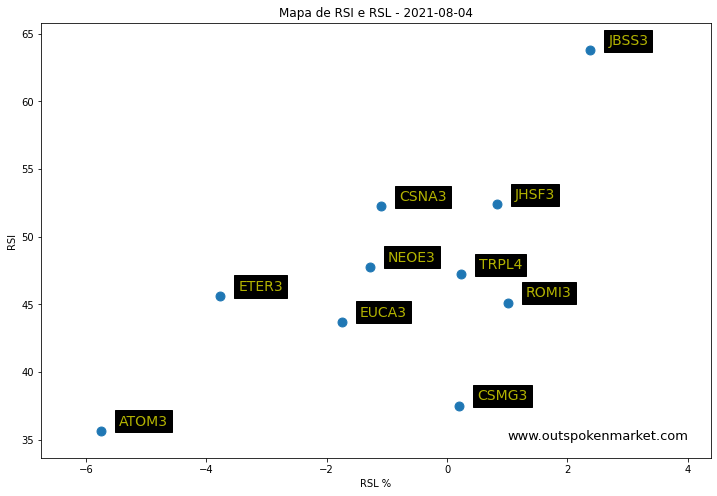

In [78]:
ativos = ['JHSF3.SA', 'TRPL4.SA', 'NEOE3.SA', 'CSNA3.SA', 'ROMI3.SA',
          'JBSS3.SA', 'ETER3.SA', 'ATOM3.SA', 'CSMG3.SA', 'EUCA3.SA']
inicio = '2020-01-01'

mapa = calcula_ifr(ativos, inicio, p=7, p_rsi=30)
plota_grafico(mapa)